# Redes Neurais Artificiais
 **Nome: João Pedro Miranda Marques**
 
 **Matrícula: 2017050495** 

# Perceptron Simples

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd

TypeError: Length of x (60) must match number of columns in z (61)

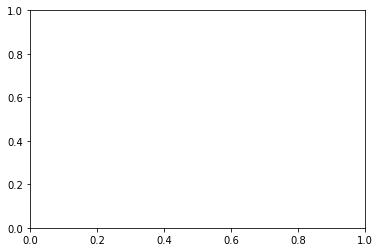

In [81]:
plt.contour(seqi, seqj, M)
plt.show()

## Exercício 3 - Perceptron Simples

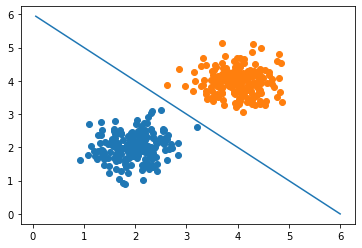

w:  [[ 0.01942481]
 [-0.03248487]]


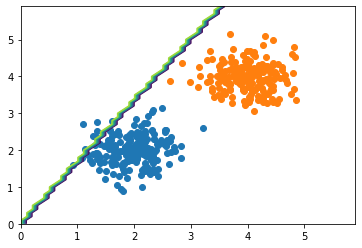

In [92]:
s1 = 0.4
s2 = 0.4
nc = 200
mu, sigma = 0, 4

xc1 = np.random.normal(0, 1, (nc, 2))*s1 + np.full((2, nc), 2).T
xc2 = np.random.normal(0, 1, (nc, 2))*s2 + np.full((2, nc), 4).T

plt.scatter(xc1[:,0], xc1[:,1])
plt.scatter(xc2[:,0], xc2[:,1])

x1_reta = np.arange(6/100, 6, 6/100)
x2_reta = -x1_reta+6

plt.plot(x1_reta, x2_reta)
plt.show()

xc = np.concatenate((xc1, xc2), axis=0)

y1 = np.zeros((nc,1))
y2 = np.ones((nc,1))
y = np.concatenate((y1, y2), axis=0)


# Treinamento do Neuronio
retlist = trainPerceptron(xc,y,0.01,0.01,50,0)

w = retlist[0]
erro = retlist[1]

print("w: ", w)

seqi = np.arange(0,6,0.1)
seqj = np.arange(0,6,0.1)
M =  np.zeros((len(seqi), len(seqj)))
ci = 0

for i in seqi:
    cj=0
    for j in seqj:
        x = np.append(i, j)
        M[ci, cj] = yPerceptron(x, w, 0)
        cj += 1
    ci += 1

plt.scatter(xc1[:,0], xc1[:,1])
plt.scatter(xc2[:,0], xc2[:,1])
plt.contour(seqi, seqj, M)
plt.show()
    

## Treinamento Perceptron

In [37]:
def trainPerceptron(xin, yd, eta, tol, maxepocas, par):
# xin : matriz Nxn com os dados de entrada
# yd: rótulos de saída (0 ou 1)
# eta : passo de treinamento
# tol : tolerância de erro
# maxepocas: número máximo de iterações par : parâmetro de entrada .
# # par=0 ==> xin tem dimensão n+1 e já inclui
# # entrada correspondente ao termo
# # de polarização.
# # par=1 ==> xin tem dimensão n e não inclui

    xin = pd.DataFrame(xin)
    yd = pd.DataFrame(yd)

    nSamples = xin.shape[0]     # Numero de amostras.
    nDimension = xin.shape[1]     # Dimensao de entrada.

    # Adiciona ou não um termo de polarização ao vetor de treinamento w.
    if par == 1:
        wt = pd.DataFrame(np.random.sample(nDimension+1) - 0.5)
        xin.insert(nDimension, nDimension, 1)
    else:
        wt = pd.DataFrame(np.random.sample(nDimension) - 0.5)

    nepocas = 0 # Contador de epocas
    eepoca = tol + 1 # Acumulador de erro de epocas

    evec = [maxepocas] # Vetor de erros

    # Laço principal de treinamento
    while (nepocas < maxepocas) & (eepoca > tol):
        ei2 = 0
        #Sequencia aleatória de treinamento
        xseq = np.random.randint(0, nSamples, nSamples)

        for i in range(nSamples):

            # Amostra dado da sequencia aleatória
            irand = xseq[i]

            # Calcula saída do Adaline
            yhati = 1.0 * (np.dot(wt.T, pd.DataFrame(xin.iloc[irand])) >=0)# yhati = xin[i] X wt.T
            yhati = pd.DataFrame(yhati)

            # Calcula erro
            ei = yd.iloc[irand] - yhati        # erro: ei = (yi − yˆi)
            ei = pd.to_numeric(ei[0][0])

            # Calcula variaçao no peso
            dw = eta * (ei * xin.iloc[irand])  # dw = η ei xis
            dw = pd.DataFrame(dw).to_numpy()

            # Ajusta vetor de pesos
            wt = pd.DataFrame(wt).to_numpy()
            wt = wt + dw                     # w(t+1) = w(t) + dw(t) 
            
            # Acumula erro por época
            ei2 += ei**2 

        # Incrementa número de épocas
        nepocas = nepocas + 1
        evec.append(ei2/nSamples)

        # Armazena erro por época
        eepoca = evec[nepocas]

    # Retorna vetores de pesos e de erros
    retlist = [wt, evec[1:nepocas]]

    return retlist

In [65]:
def yPerceptron(xvec,w, par):
# xvec : vetor de entrada
# w: vetor de pesos
# yp: resposta do Perceptron

    if(par==1):
        xvec = np.append(1, xvec)

    u = np.dot(xvec, w)
    y = 1.0 * ( u >= 0 )
    
    return y 